<a href="https://colab.research.google.com/github/Himagination/Machine_Learning_Projects_Python/blob/main/MNIST_first_touch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST
*  Set of 70000 small images of digits handwritten.
*  Each image is labeled with the digits it represents.

# DATA
*  The data can be obtained from Scikit-Learn provides many helper function.

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

*There are 70,000 images with 784 features. 784 accounts for 28X28 pixels and each feature represents one pixels intensity.*

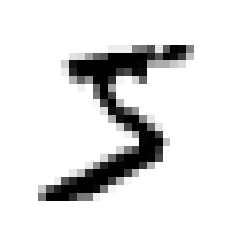

(None, '5')

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show(), y[0]

In [9]:
# Cast labels to integer from string
import numpy as np
y = y.astype(np.uint8)

In [10]:
# Creating train-test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier
*  Problem is simplified to create a Binary classifier which is capable of distinguishing between just two classes- 5 and not-5s.

In [11]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=31415926)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures
*  Measuring Accuracy using Cross-Validation.
*  Confusion Matrix.
*  Precision and Recall.
*  The ROC curve.

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.96745, 0.96665, 0.94995])

In [14]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [15]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53967,   612],
       [ 1707,  3714]])

In [16]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train_5, y_train_pred)

0.8585298196948682

In [17]:
recall_score(y_train_5, y_train_pred)

0.6851134477033758

In [18]:
f1_score(y_train_5, y_train_pred)

0.7620806401969837

In [19]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

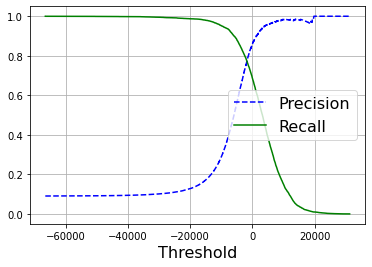

In [22]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.legend(loc="center right", fontsize=16)
  plt.xlabel("Threshold", fontsize=16)
  plt.grid(True)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()